<a href="https://colab.research.google.com/github/tamburins/ESAA-2022-/blob/main/ESAA_11_21_290_319(except303_310).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 05 회귀
### 01 회귀 소개

 - 사람의 키가 평균키로 회귀하려는 성질이 있다는 자연 법칙처럼, 데이터값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법

- 여러개의 독립변수와 한 개의 종속변수간의 상관관계를 모델링하는 기법을 통칭하는데, 이 독립변수와 종속변수간의 상관관계를 표현하는 것을 회귀계수라 표현함.

- 머신러닝에서는 독립변수가 피처, 종속변수가 결정값으로 머신러닝 회귀예측의 최종 목표는 주어진 피처와 결정값데이터 기반에서 학습을 통해 최적의 회귀계수를 찾아내는 것

- 선형과 비선형회귀, 단일회귀와 다중 회귀로 나뉘며 지도학습의 경우 예측값이 카테고리인 이산형클래스의 분류와 예측값이 연속형 숫자값인 회귀로 나뉨

- 선형 회귀는 실제값과 예측값의 차이(오류의 제곱값)을 최소화하는 직선형 회귀식을 최적화 하는 것으로, 규제방법에 따라 나뉨.
> 일반 선형 회귀 : 예측값과 실제 값의 Residual Sum of square를 최소화할 수 있도록 회귀계수를 최적화, 규제 x

> Ridge: 선형회귀에 L2규제를 추가한 회귀모델로, L2규제란 상대적으로 큰 회귀계수값의 예측영향도를 감소시키기 위해 회귀계수를 더 작게 만드는 규제

> Lasso : 선형회귀에 예측 영향력이 적은 피처의 회귀계수를 0으로 만들어 피처가 선택되지 않도록 하는 L1규제를 추가한 방식으로 피처 선택기능으로 유용

> ElasticNet: L2, L1규제를 함께 결합한 모델로 피처가 많은 데이터세트에서 적용되며 L1에서 피처 개수를, L2에서 계수값의 크기를 조절

> 로지스틱 회귀: 강력한 분류 알고리즘으로 이진분류뿐만 아니라 희소 영역의 분류에서 예측 성능을 뚜렷하게 보임

### 02 단순 선형 회귀를 통한 회귀 이해

- 실제 값과 회귀 모델 차이에 따른 오류값을 잔차라 일컫는데 최적의 회귀모형은 이러한 잔차를 최소화하는 것으로 오류값 합이 최소가될 수 있는 최적의 회귀계수를 찾는 것

- 오류값은 양수도 음수도 될 수 있기에 보통 제곱하여 그 합을 구함으로써 회귀계수의 타당성을 찾는데, 이를 Residual Sum of square(RSS)라 칭함

- 회귀계수를 변수로 하는 RSS식을 이용하여 정규화된 식으로 표현할 수 있으며, 우리는 이를 비용함수라 함. 머신러닝에서는 이 비용함수가 반환하는 값을 지속해서 감소시키고 최종적으로는 더이상 감소하지 않는 최소의 오류값을 구하고자 함

### 03 비용 최소화하기 - 경사하강법(Gradient Descent) 소개

- 점진적으로 반복적인 계산을 통해 W파라미터값을 업데이트하며 오류값이 최소가 되도록 구하는 방식으로

- 반복적으로 비용함수의 반환값, 즉 예측값과 실제값의 차이가 작아지는 방향성을 갖고 w파라미터를 지속해서 보정하는데 오류값이 더 이상 작아지지 않으면 그 오류값을 최소 비용으로 판단하고 그때의 w값을 최적의 파라미터라 판단

- 최소값은 2차함수의 최저점이 2차함수의 미분값인 1차함수값이 0이되는 지점이었듯, 미분된 함수의 기울기가 더이상 감소하지 않는 지점으로 삼음

- 변수가 하나였던 2차함수와 달리, 비용함수는 이변수이기 때문에 편미분을 진행하여 최소지점을 구하고, 이러한 편미분 결괏값을 반복적으로 보정하며 비용함수가 최소가 되는 w1, w0를 구하는데, 이 때 새로운 w를 이전 w에서 편미분 결과값을 마이너스하면서 적용하는데 이러한 편미분값이 너무 클 수 있기 때문에 보정하기 위해 보정계수를 곱함 (학습률)


> w1, w0를 임의의 값으로 설정하고 비용함수에 대입하여 계산

> w1, w0를 식에 대입하여 업데이트 한 후 이것으로 비용함수에 대입하여 계산

> 비용함수의 값이 감소했으면 다시 스텝2를 반복, 더이상감소하지 않으면 그 때의 w1, w0를 구하고 종료





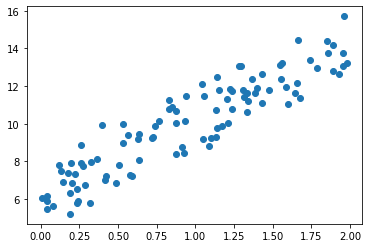

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y = 4X +6을 근사 (w1=4, w0=6).임의의 값은 노이즈를 위해 만듦
X=2*np.random.rand(100,1)
y= 6+4 * X +np.random.randn(100,1)

#X,y데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [23]:
# 비용함수 정의
def get_cost(y, y_pred):
  N= len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

In [24]:
#경사하강법 함수 생성 및 구현
# wi를를 0으로로 초기화한뒤뒤 iter 개수만큼큼 w1, w0을을 업데이트트
#x, y는는 넘파이이 ndarray로로 입력받음음
# 넘파이의의 내적연산인인 dot()을 이용하여여 예측배열값을 계산산
#get_weight_update는는 업데이트한한 wi를 넘파이의의 dot 행렬연산으로로 계산한한 뒤뒤 이를를 반환환

#w1, w0르르 업데이트할할 w1_update, w0_update
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N=len(y)
  #먼저저 w1_update, w0_update를를 각각각 w1, w0의의 shape가가 동일한한 크기를를 가진진 0값아ㅡ로로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측측 배열열 계산하고고 예측과과 실제값의의 차이이 계산산
  y_pred = np.dot(X, w1.T) + w0
  diff = y-y_pred

  #w0_update를를 Dot행렬렬 연산으로로 구하기기 위해해 모두두 1값을을 가진진 행렬렬 생성성
  w0_factors = np.ones((N,1))
  #w1과 w0를를 업데이트하하 w1_update와와 w0_update 계산산
  w1_update = -(2/N)*learning_rate * (np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate * (np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [25]:
#입력인자자 iters로로 주어진진 횟수만큼큼 반복적으로로 w1과과 w0를를 업데이트트 적용함함
def gradient_descent_steps(X, y, iters=100000):
  #w0, w1 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  
  #인자로로 주어진진 iters만큼큼 반복적으로로 get_weight_updates() 호출해해 w1, w0 업데이트트 수행행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
    w1 = w1- w1_update
    w0 = w0- w0_update
  return w1, w0

In [26]:
#gradient descent steps 호출출, w1과과 w0 구하기기
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print('w1: {0:.3f}, w0: {1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Grdient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))


w1: 4.022, w0: 6.162
Grdient Descent Total Cost:0.9935


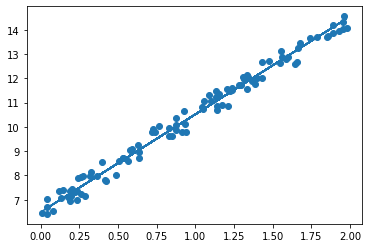

In [19]:
# with y _pred, draw regression line!
plt.scatter(X, y)
plt.plot(X, y_pred)

- 경사하강법은 모든 학습데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에, 수행시간이 오래걸리므로 확률적 경사 하강법이나 미니 배치 확률적 경사하강법을 대신 사용



In [29]:
# no big difference
# just differ in drawing data with batch_size, calculating w1-update, w0_update
def stochastic_gradient_descent_steps(X,y,batch_size = 10 , iters=1000):
  w0= np.zeros((1,1))
  w1= np.zeros((1,1))
  prev_cost = 100000
  iter_index= 0

  for ind in range(iters):
    np.random.seed(ind)
    #전체 X,y데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
  return w1, w0

In [30]:
# with def, cal!
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1":', round(w1[0,0],3), 'w0: ', round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('S G D total Cost : {0:.4f}'.format(get_cost(y, y_pred)))


w1": 4.028 w0:  6.156
S G D total Cost : 0.9937


미니 배치 확률적 경사하강법은 경사하강법에 비해 큰 차이가 없으며 예측 오류비용 또한 큰차 이가 없으므로 일반적으로 확률적 경사 하강법을 이용함

- 피처가 여러개인 경우 그에 따라 피처 개수 + 1개의 회귀계수를 도출하여 예측 회귀식을 생성할 수 있음

### 05 다항회귀와 과(대)적합/ 과소적합 이해

#### 다항 회귀 이해
- 독립변수의 단항식이 아닌 2,3차 방정식과 같은 다항식으로 표현되는 방정식을 다항회귀라 하며, 이 또한 선형회귀의 일종으로 선형회귀의 구분 기준은 회귀계수의 선형, 비션형 여부임

- 사이킷런은 다항회귀 클래스를 명시적으로 제공하지 않아 비선형 함수를 선형 모델에 적용하여 구현함

- polynomialFeatures 클래스를 이용하면 알아서 fit과 transform을 이용하여 변환해줌, polynomial 피처로 변환!

In [31]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로로 변환한한 단항식식 생성성, [[0,1], [2,3]]의의 2X2 행렬렬 생성성
X = np.arange(4).reshape(2,2)
print('일차차 단항식식 계수수 피처처 :\n', X)

#degree = 2 인인 이차차 다항식으로로 변환하기기 위해해 PolynomialFeatures를를 이용해해 변환환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된된 2차 다항식식 계수 피처처:\n', poly_ftr)


일차차 단항식식 계수수 피처처 :
 [[0 1]
 [2 3]]
변환된된 2차 다항식식 계수 피처처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [37]:
def polynomial_func(X):
  y = 1 + 2 * X[:,0] + 3*X[:,0]**2 + 4 * X[:,1]**3
  return y

X=np.arange(4).reshape(2,2)
print('일차차 단항식식 계수수 feature: \n',X)
y = polynomial_func(X)
print('삼차다항식식 결정값값 ', y)

일차차 단항식식 계수수 feature: 
 [[0 1]
 [2 3]]
삼차다항식식 결정값값  [  5 125]


In [41]:
#3차차 다항식식 변환환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차차 다항식식 계수수 feature: \n', poly_ftr)

from sklearn.linear_model import LinearRegression
#linear regression에에 3차차 다항식식 계수수 feature와와 3차차 다항식식 결정값으로로 학습습 후후 회귀계수수 확인인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀계수 \n', np.round(model.coef_, 2))
model.fit(poly_ftr, y)
print('Polynomial 회귀계수수 \n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape ', model.coef_.shape)


3차차 다항식식 계수수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀계수수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape  (10,)


In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2 * X[:,0] + 3*X[:,0]**2 + 4 * X[:,1]**3
  return y

#pipeline으로로 streaamine하게게 polynomial feature 변환과과 linear regression 연결결
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('polynomial 회귀계수수 \n', np.round(model.named_steps['linear'].coef_,2))



polynomial 회귀계수수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


#### 다항 회귀를 이용한 과소적합 및 과적합 이해

- 다항식 차수가 높아질수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터환경에서는 오히려 예측 정확도가 떨어질 수 있음

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의의 값으로로 구성된된 X 값에에 대해해 코사인인 변환값을을 반환환
def true_fun(X):
  return np.cos(1.5 * np.pi*X)

#X는는 0부터터 1까지지 30개의의 임의값을을 순서대로로 샘플링한한 데이터터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))


# y 값은은 코사인인 기반의의 true_fun()에서서 약간의의 노이즈즈 변동값을을 더한한 값값
y = true_fun(X) + np.random.randn(n_samples)*0.1


Degree1 회귀계수는는 [-1.61]입니다
Degree 1 MSE 는는 0.4077289625098685입니다

Degree4 회귀계수는는 [  0.47 -17.79  23.59  -7.26]입니다
Degree 4 MSE 는는 0.04320874987232072입니다

Degree15 회귀계수는는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08]입니다
Degree 15 MSE 는는 180526263.3177066입니다


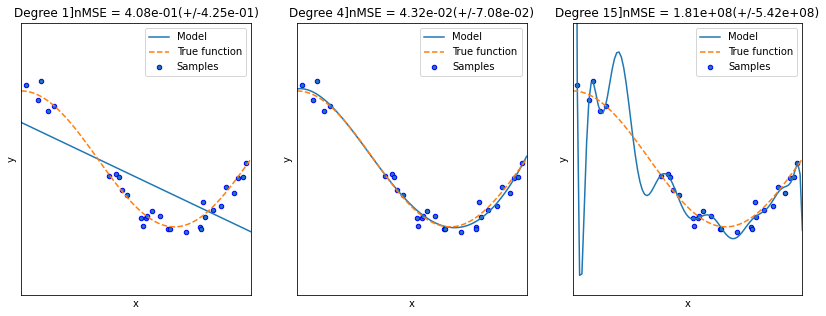

In [9]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항회귀의의 차수를를 1,4,15 change and check
for i in range(len(degrees)):
  ax =plt.subplot(1,len(degrees), i+1)
  plt.setp(ax, xticks=(), yticks=())

  #transform each degree to polynomial
  polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                       ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1, 1),y)

  # evaluate with cross check
  scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
  # pipeline을을 구성하는는 세부객체를를 접근한느느 named_steps['객체명명']을을 이용해해 회귀계수수 추출출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree{0} 회귀계수는는 {1}입니다'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE 는는 {1}입니다'.format(degrees[i], -1*np.mean(scores)))

  #0부터터 1까지지 테스트데이터세트를를 100개로로 나누어어 예측측 수행행
  #테스트트 데이터터 세트에에 회귀예측을을 수해하고고 예측곡선을을 시제곡선을을 그려려 비교교
  X_test = np.linspace(0,1,100)
  #예측값값 곡선선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
  #실제값값 곡선선
  plt.plot(X_test, true_fun(X_test), '--', label="True function")
  plt.scatter(X,y,edgecolor = 'b', s=20, label = "Samples")

  plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc = "best")
  plt.title("Degree {}]nMSE = {:.2e}(+/-{:.2e})".format(degrees[i], -scores.mean(),scores.std()))
plt.show()

- 맨 왼쪽의 Degree 1 예측곡선은 단순한 직선으로서 단순 선형회귀와 동일. 실제 데이터세트인 코사인 데이터 세트를 직선으로 예측하기에는 단순해보이고, 과소적합모델으로 MSE가 0.407

- Degree 4 예측곡선은 실제 데이터세트와 유사한 것으로 잡음까지 예측하진 못했으나 비교적 잘 예측한 것으로 MSE는 0.043

- 맨 오른쪽 Degree 15는 MSE가 18xxxxxxx으로 극단적인 오류값이 발생하였고, 잡음값까지 지나치게 반영하며 이런 값이 발생함. 과적합의 대표적 예시

- degree 15에서는 회귀계수 값이 매우 큼. 결국 학습데이터이 패턴을 지나치게 단순화한 과소적합도, 과적합도 아닌 균형잡힌 모델이 좋은 예측 모델

#### 편향 - 분산 트레이드오프(Bias-Variance Trade Off)

-degree 1 - 대표적인 고편향성 모델,  degree 15 - 대표적인 고분산성 모델로 편향과 분산은 한쪽이 커지면 한쪽이 낮아지는 경향이 있기 때문에 편향을 낮추고 분산을 높이면서 전체 오류가 낮아지는 골디락스 지점을 통과하며 분산을 지속적으로 높이면 오류값이 오히려 증가하며 예측성능이 다시 저하

- 둘 사이의 트레이드오프를 이루면서 error cost가 최대로 낮아지는모델을 구축해야함